<a href="https://colab.research.google.com/github/Mubarakhussain1/Retail-analysis/blob/master/capstone_Project_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Retail**

![](https://www.foodnavigator-asia.com/var/wrbm_gb_food_pharma/storage/images/publications/food-beverage-nutrition/foodnavigator-asia.com/article/2018/07/02/five-key-features-that-will-shape-the-online-retail-store-of-the-future/8266733-1-eng-GB/Five-key-features-that-will-shape-the-online-retail-store-of-the-future.jpg)


#**Capstone Project: Retail**

###**Problem Statement:**


- It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
- Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits.
- Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).
- Dataset Description: This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.


###**Dataset Description:**

This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.


**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description:** Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country:** Country name. Nominal, the name of the country where each customer resides.



##**Project Task: Week 1:**

###**Data Cleaning:**

**Perform a preliminary data inspection and data cleaning.**

a. Check for missing data and formulate an apt strategy to treat them.

b. Remove duplicate data records.

c. Perform descriptive analytics on the given data.

###**Data Transformation:**

**Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.**

a. Create month cohorts and analyze active customers for each cohort.

b. Analyze the retention rate of customers.


##**Project Task: Week 2**

###**Data Modeling :**

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

2. Calculate RFM metrics.

3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

 b1.Combine three ratings to get a RFM segment (as strings).

 b2. Get the RFM score by adding up the three ratings.

 b3. Analyze the RFM segments by summarizing them and comment on the findings.

**Note:** Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

**Note:** Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money.




##**Project Task: Week 3**

###**Data Modeling :**

Create clusters using k-means clustering algorithm.

  a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

 b. Decide the optimum number of clusters to be formed.

 c. Analyze these clusters and comment on the results.



##**Project Task: Week 4**
   
###**Data Reporting:**

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

  a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

  b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

  c. Bar graph to show the count of orders vs. hours throughout the day

  d. Plot the distribution of RFM values using histogram and frequency charts

  e. Plot error (cost) vs. number of clusters selected

  f. Visualize to compare the RFM values of the clusters using heatmap


#**SOLUTION:**



##**Week 1:**

##**(A) Data Cleaning**

**(1) Reading Data and Preliminary Data Inspection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.2)

In [ ]:
df=pd.read_excel('/content/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Check shape of data
df.shape

(541909, 8)

In [ ]:
# Check feature details of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- **(a) Missing values treatment:**

In [ ]:
# Check missing values in data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#check percentage of missing value in data
df_null=round(df.isnull().sum()/len(df)*100,2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [ ]:
df = df.drop('Description', axis=1)
df = df.dropna()
df.shape


(406829, 7)

- **(b) Remove duplicate data records:** Since our data is transactional data and it has duplicate entries for InvoiceNo and CustomerID, we will drop only those rows which are completely duplicated, not on the basis of any one particular column such as InvoiceNo or CustomerID etc.

In [ ]:
df = df.drop_duplicates()
df.shape

(401602, 7)

- **(c) Perform descriptive anaylysis on the given data:**

In [ ]:
# CustomerID is 'float64', changing the datatype of CustomerId to string as Customer ID as numerical data does not make sense

df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
df.describe(datetime_is_numeric=True)

,Quantity,InvoiceDate,UnitPrice
count,401602.000000,401602,401602.000000
mean,12.182579,2011-07-10 12:08:08.129839872,3.474064
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-29 15:40:00,1.950000
75%,12.000000,2011-10-20 11:58:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,250.283248,NaN,69.764209


- **Quantity:** Average quantity of each product in transaction is 12.18. Also note that minimum value in Quantity column is negative. This implies that some customers had returned the product during our period of analysis.

- **InvoiceDate**: Our data has transaction between 01-12-2010 to 09-12-2011

- **UnitPrice:** Average price of each product in transactions is 3.47

In [ ]:
df.describe(include=['O'])

,InvoiceNo,StockCode,CustomerID,Country
count,401602,401602,401602,401602
unique,22190,3684,4372,37
top,576339,85123A,17841.0,United Kingdom
freq,542,2065,7812,356726


- **InvoiceNo:** Total entries in preprocessed data are 4,01,602 but transactions are 22,190. Most number of entries (count of unique products) are in Invoice No. '576339' and is 542 nos.

- **StockCode:** There are total 3684 unique products in our data and product with stock code '85123A' appears most frequently (2065 times) in our data.

- **CustomerID:** There are 4372 unique customers in our final preprocessed data. Customer with ID '17841' appears most frequently in data (7812 times)
Country: Company has customers across 37 countries. Most entries are from United Kingdom in our dataset (356726)

##**(B) Data Transformation**

  **(2) Perform Cohort Analysis**

**(a) Create month cohort of customers and analyze active customers in each cohort:**

In [ ]:
# Convert InvoiceDate into month year format
df['month_year']=df['InvoiceDate'].dt.to_period('M')
df['month_year'].nunique()


13

In [ ]:
month_cohort=df.groupby('month_year')['CustomerID'].nunique()
month_cohort

month_year
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Freq: M, Name: CustomerID, dtype: int64

Text(0.5, 1.0, 'No. of Active Customers')

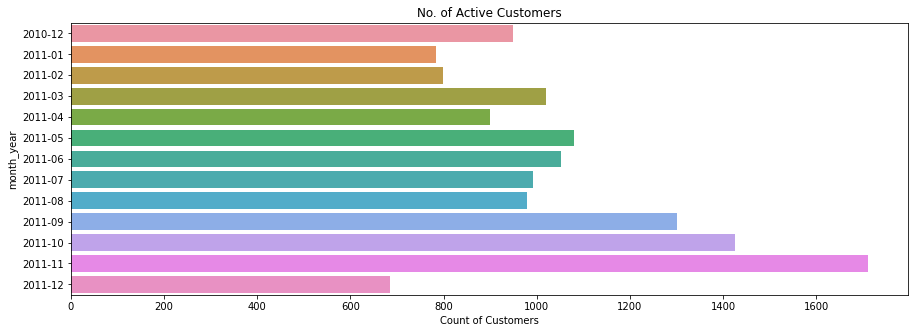

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(y= month_cohort.index, x= month_cohort.values)
plt.xlabel('Count of Customers')
plt.title('No. of Active Customers')

In [ ]:
month_cohort-month_cohort.shift(1)

month_year
2010-12       NaN
2011-01    -165.0
2011-02      15.0
2011-03     222.0
2011-04    -121.0
2011-05     180.0
2011-06     -28.0
2011-07     -58.0
2011-08     -13.0
2011-09     322.0
2011-10     123.0
2011-11     286.0
2011-12   -1025.0
Freq: M, Name: CustomerID, dtype: float64

In [ ]:
retention_rate=round(month_cohort.pct_change(periods=1)*100,2)
retention_rate

month_year
2010-12      NaN
2011-01   -17.41
2011-02     1.92
2011-03    27.82
2011-04   -11.86
2011-05    20.02
2011-06    -2.59
2011-07    -5.52
2011-08    -1.31
2011-09    32.86
2011-10     9.45
2011-11    20.07
2011-12   -59.91
Freq: M, Name: CustomerID, dtype: float64

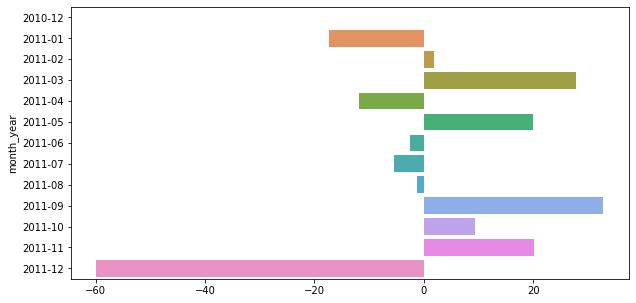

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y = retention_rate.index, x = retention_rate.values);



##**Week 2:**

**Monetary analysis:**

In [ ]:
df['amount']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,amount
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [ ]:
df_monetary=df.groupby('CustomerID').sum()['amount'].reset_index()
df_monetary

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2045.53


**Frequency Analysis:**

In [ ]:
df_frequency=df.groupby('CustomerID').nunique()['InvoiceNo'].reset_index()
df_frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


**Recency Analysis:**


In [ ]:
# We will fix reference date for calculating recency as last transaction day in data + 1 day
ref_day = max(df['InvoiceDate']) + timedelta(days=1)
df['days_to_last_order'] = (ref_day - df['InvoiceDate']).dt.days
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,amount,days_to_last_order
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,374
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,374
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374


In [ ]:
df_recency = df.groupby('CustomerID')['days_to_last_order'].min().reset_index()
df_recency

,CustomerID,days_to_last_order
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
4367,18280.0,278
4368,18281.0,181
4369,18282.0,8
4370,18283.0,4


**Calculate RFM metrics:**

In [ ]:
df_rf = pd.merge(df_recency, df_frequency,  on='CustomerID', how='inner')
df_rfm = pd.merge(df_rf, df_monetary, on='CustomerID', how='inner')
df_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
df_rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


**Build RFM Segments:**

newest    2734
newer      588
medium     416
older      353
oldest     281
Name: recency_labels, dtype: int64

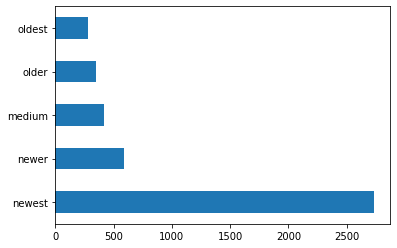

In [ ]:
df_rfm['recency_labels'] = pd.cut(df_rfm['Recency'], bins=5,
                                     labels=['newest', 'newer', 'medium', 'older', 'oldest'])
df_rfm['recency_labels'].value_counts().plot(kind='barh');
df_rfm['recency_labels'].value_counts()

lowest     4348
lower        18
medium        3
highest       2
higher        1
Name: frequency_labels, dtype: int64

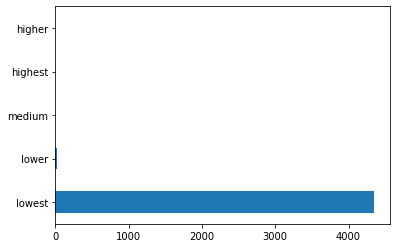

In [ ]:
df_rfm['frequency_labels'] = pd.cut(df_rfm['Frequency'], bins=5, labels=['lowest', 'lower', 'medium', 'higher', 'highest'])
df_rfm['frequency_labels'].value_counts().plot(kind='barh');
df_rfm['frequency_labels'].value_counts()

smallest    4357
smaller        9
medium         3
largest        2
larger         1
Name: monetary_labels, dtype: int64

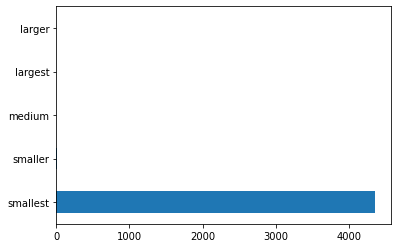

In [ ]:
df_rfm['monetary_labels'] = pd.cut(df_rfm['Monetary'], bins=5, labels=['smallest', 'smaller', 'medium', 'larger', 'largest'])
df_rfm['monetary_labels'].value_counts().plot(kind='barh');
df_rfm['monetary_labels'].value_counts()

In [ ]:
df_rfm['rfm_segment'] = df_rfm[['recency_labels','frequency_labels','monetary_labels']].agg('-'.join, axis=1)
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest


**RFM Score:**

In [ ]:
recency_dict = {'newest': 5, 'newer':4, 'medium': 3, 'older':2, 'oldest':1}
frequency_dict = {'lowest':1, 'lower':2, 'medium': 3, 'higher':4, 'highest':5}
monetary_dict = {'smallest':1, 'smaller':2, 'medium': 3, 'larger':4, 'largest':5}

df_rfm['rfm_score'] = df_rfm['recency_labels'].map(recency_dict).astype(int)+ df_rfm['frequency_labels'].map(frequency_dict).astype(int) + df_rfm['monetary_labels'].map(monetary_dict).astype(int)
df_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest,7
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest,7
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest,7
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest,3
5,12352.0,36,11,1545.41,newest,lowest,smallest,newest-lowest-smallest,7
6,12353.0,204,1,89.00,medium,lowest,smallest,medium-lowest-smallest,5
7,12354.0,232,1,1079.40,older,lowest,smallest,older-lowest-smallest,4
8,12355.0,214,1,459.40,medium,lowest,smallest,medium-lowest-smallest,5
9,12356.0,23,3,2811.43,newest,lowest,smallest,newest-lowest-smallest,7


**Analyze RFM Segment and Score:**

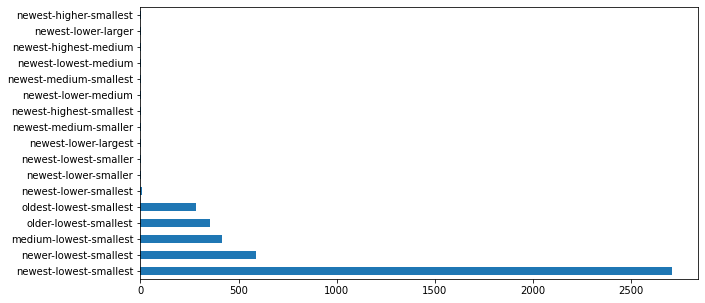

In [ ]:
df_rfm['rfm_segment'].value_counts().plot(kind='barh', figsize=(10, 5));

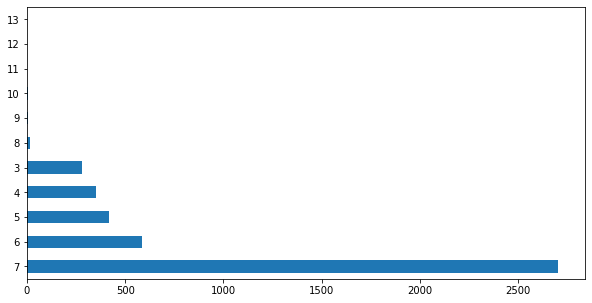

In [ ]:
df_rfm['rfm_score'].value_counts().plot(kind='barh', figsize=(10, 5));

##**Week 3**

###**Data Modeling:**

  **1.Create clusters using k-means clustering algorithm.**

  **a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data** 

In [ ]:
print(df_rfm.shape)


(4372, 9)


In [ ]:
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest,7
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest,7
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest,7
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest,3


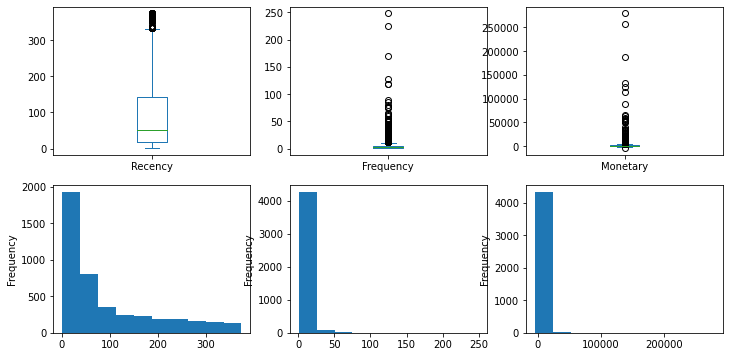

In [ ]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    df_rfm[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    df_rfm[feature].plot(kind='hist')

**Outliers:** Frequency and Monetary features in above data seem to have lot of outliers. Lets drop them.

In [ ]:
df_rfm = df_rfm[(df_rfm['Frequency']<60) & (df_rfm['Monetary']<40000)]
df_rfm.shape

(4346, 9)

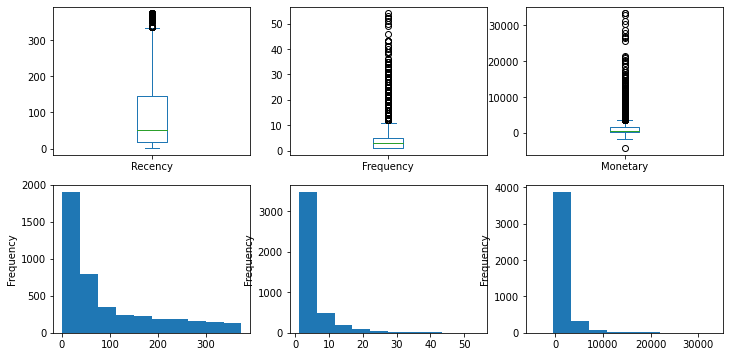

In [ ]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    df_rfm[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    df_rfm[feature].plot(kind='hist')

**Log Transformation:** Now since all three features have right skewed data therefore we will use log transformation of these features in our model.

In [ ]:
df_rfm_log_trans = pd.DataFrame()
df_rfm_log_trans['Recency'] = np.log(df_rfm['Recency'])
df_rfm_log_trans['Frequency'] = np.log(df_rfm['Frequency'])
df_rfm_log_trans['Monetary'] = np.log(df_rfm['Monetary']-df_rfm['Monetary'].min()+1)

**Standard Scalar Transformation:** It is extremely important to rescale the features so that they have a comparable scale.

In [ ]:
scaler = StandardScaler()

df_rfm_scaled = scaler.fit_transform(df_rfm_log_trans[['Recency', 'Frequency', 'Monetary']])
df_rfm_scaled

df_rfm_scaled = pd.DataFrame(df_rfm_scaled)
df_rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
df_rfm_scaled.head()

,Recency,Frequency,Monetary
0,1.402988,-0.388507,-0.770922
1,-2.100874,0.967301,1.485132
2,0.392218,0.361655,0.364190
3,-0.552268,-1.138669,0.342970
4,1.368370,-1.138669,-0.527416



**b. Build K-Means Clustering Model and Decide the optimum number of clusters to be formed.**

In [ ]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [ ]:
kmeans.labels_

array([0, 2, 1, ..., 1, 2, 1], dtype=int32)

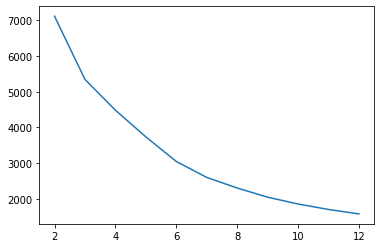

In [ ]:
# Finding the Optimal Number of Clusters with the help of Elbow Curve/ SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(df_rfm_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters,ssd);

In [ ]:
# Creating dataframe for exporting to create visualization in tableau later
df_inertia = pd.DataFrame(list(zip(range_n_clusters, ssd)), columns=['clusters', 'intertia'])
df_inertia

,clusters,intertia
0,2,7113.097396
1,3,5342.877130
2,4,4481.226147
3,5,3733.801609
4,6,3044.801566
5,7,2598.370303
6,8,2301.773542
7,9,2044.709720
8,10,1852.985074
9,11,1700.384062


In [ ]:
# Finding the Optimal Number of Clusters with the help of Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_rfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(df_rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.44132753537785846
For n_clusters=3, the silhouette score is 0.3803019251906771
For n_clusters=4, the silhouette score is 0.36198458786557786
For n_clusters=5, the silhouette score is 0.3648807818731976
For n_clusters=6, the silhouette score is 0.3456657606244017
For n_clusters=7, the silhouette score is 0.34295114819906586
For n_clusters=8, the silhouette score is 0.3355598833951529
For n_clusters=9, the silhouette score is 0.346301798458803
For n_clusters=10, the silhouette score is 0.3560796733393902


We can select optimum number of clusters as 3 in our final model

In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

**c. Analyze these clusters and comment on the results.**

In [ ]:
# assign the label
df_rfm['Cluster_Id'] = kmeans.labels_
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score,Cluster_Id
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3,1
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest,7,0
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest,7,2
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest,7,1
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest,3,1


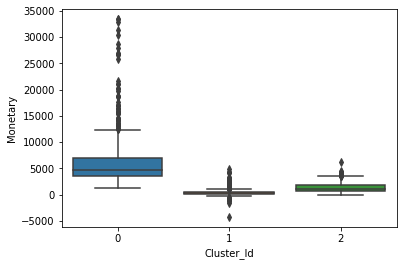

In [ ]:
# Box plot to visualize Cluster Id vs Monetary
sns.boxplot(x='Cluster_Id', y='Monetary', data=df_rfm);

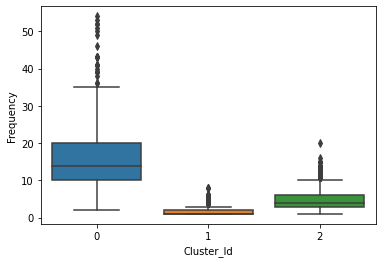

In [ ]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=df_rfm);

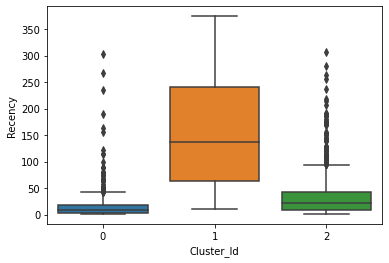

In [ ]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data=df_rfm);

##**Inference:**
**As we can observe from above boxplots that our model has nicely created 3 segements of customer with the interpretation as below:**

- Customers with Cluster Id 0 are less frequent buyers with low monetary expenditure and also they have not purchased anything in recent time and hence least important for business.
- Customers with Cluster Id 1 are the customers having Recency, Frequency and Monetary score in the medium range.
- Customers with Cluster Id 2 are the most frequent buyers, spending high amount and recently placing orders so they are the most important customers from business point of view.

In [ ]:
with pd.ExcelWriter('Output.xlsx') as writer:
  df.to_excel(writer, sheet_name='master_data', index=False)
  df_rfm.to_excel(writer, sheet_name='rfm_data', index=False)
  df_inertia.to_excel(writer, sheet_name='inertia', index=False)
  

In [ ]:
  product_desc = pd.read_excel("Online Retail.xlsx")
product_desc = product_desc[['StockCode', 'Description']]
product_desc = product_desc.drop_duplicates()
product_desc.to_csv('product_desc.csv', index=False)